In [2]:
import torch 
from quantizers.quantizer import VoronoiQuantizer, GridQuantizer
import numpy as np
all_data = np.load("data/raw/Concrete_Compressive_Strength/all_data.npy",allow_pickle=True).item()
train_y = all_data["train_y"]

# quantizer = VoronoiQuantizer(train_y, 50)
# load_file = torch.load("logs/Concrete_Compressive_Strength/voronoi/20240920-092909/quantizer.pth", weights_only=True)

quantizer = GridQuantizer(train_y, 50)
load_file = torch.load("logs/Concrete_Compressive_Strength/grid/20240920-092823/quantizer.pth", weights_only=True)

quantizer.load_state_dict(load_file)

protos_np = quantizer.protos.detach().numpy()


In [42]:
quantizer.get_data_boundary_box()

(np.float64(-2.4405373757590234), np.float64(3.22971984548221))

In [43]:
quantizer.get_areas()

tensor([0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134,
        0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134,
        0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134,
        0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134,
        0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134,
        0.1134, 0.1134, 0.1134, 0.1134, 0.1134], dtype=torch.float64)

In [14]:
points = np.random.rand(10, 3)  # 10 random points in 3D
boundaries = [(0, 1), (0, 1), (0, 1)]  # Unit cube boundaries

In [22]:
import numpy as np

# Generate random points in 3D
points = np.random.rand(10, 3)  # 10 random points in 3D
boundaries = [(0, 1), (0, 1), (0, 1)]  # Unit cube boundaries

# Compute the clipped Voronoi cell volumes
volumes = boundary_clipped_voronoi_areas_nd(points, boundaries)
total_volume = np.sum(volumes)

print("Clipped Voronoi cell volumes:", volumes)
print("Total volume:", total_volume)


Clipped Voronoi cell volumes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total volume: 0


/tmp/ipykernel_637890/169482388.py:85: DeprecationWarning: Please import `QhullError` from the `scipy.spatial` namespace; the `scipy.spatial.qhull` namespace is deprecated and will be removed in SciPy 2.0.0.
  except scipy.spatial.qhull.QhullError:


In [16]:
np.sum(boundary_clipped_voronoi_areas_nd(points, boundaries))

np.float64(1.0837997001446615)

In [8]:
points

array([[0.4436303 , 0.84190909, 0.23228074],
       [0.40229573, 0.00557188, 0.26525425],
       [0.68324433, 0.46953145, 0.98827728],
       [0.06476166, 0.39168521, 0.12317785],
       [0.20056503, 0.62183655, 0.85068281],
       [0.72717745, 0.82323941, 0.05080954],
       [0.50134728, 0.974894  , 0.44429331],
       [0.82975119, 0.20128048, 0.95729529],
       [0.03766609, 0.36042346, 0.65209411],
       [0.99793185, 0.49686491, 0.47589667]])

In [5]:
boundaries.shape

AttributeError: 'list' object has no attribute 'shape'

In [44]:
quantizer.maxs

array([3.22971985])

In [45]:
quantizer.mins

array([-2.44053738])

In [46]:
quantizer.protos

Parameter containing:
tensor([[-2.3838e+00],
        [-2.2704e+00],
        [-2.1570e+00],
        [-2.0436e+00],
        [-1.9302e+00],
        [-1.8168e+00],
        [-1.7034e+00],
        [-1.5900e+00],
        [-1.4766e+00],
        [-1.3632e+00],
        [-1.2498e+00],
        [-1.1364e+00],
        [-1.0230e+00],
        [-9.0957e-01],
        [-7.9616e-01],
        [-6.8276e-01],
        [-5.6935e-01],
        [-4.5595e-01],
        [-3.4254e-01],
        [-2.2914e-01],
        [-1.1573e-01],
        [-2.3268e-03],
        [ 1.1108e-01],
        [ 2.2448e-01],
        [ 3.3789e-01],
        [ 4.5129e-01],
        [ 5.6470e-01],
        [ 6.7810e-01],
        [ 7.9151e-01],
        [ 9.0491e-01],
        [ 1.0183e+00],
        [ 1.1317e+00],
        [ 1.2451e+00],
        [ 1.3585e+00],
        [ 1.4719e+00],
        [ 1.5853e+00],
        [ 1.6988e+00],
        [ 1.8122e+00],
        [ 1.9256e+00],
        [ 2.0390e+00],
        [ 2.1524e+00],
        [ 2.2658e+00],
        [ 2.

In [47]:
quantizer.protos.min()

tensor(-2.3838)

In [18]:
points.shape

(2, 10)

In [26]:
from scipy.spatial import Voronoi, ConvexHull
# x=[0,1,0,1,0,1,0,1,0,1,2,3,2,4,2,3]
# y=[0,0,1,1,2,2,3,3.5,4,4.5,3,2,3.5,2.5,3.7,2.2]
# z=[0,0,0,0,0,1,1,1,1,1,1,1,1,4.4,2.2,3.3]
x = np.random.randint(low=0, high=100, size=100)
y = np.random.randint(low=0, high=100, size=100)
z = np.random.randint(low=0, high=100, size=100)
points=np.array([x,y,z]).T
print(points)
vor=Voronoi(points)

def voronoi_volumes(points):
    v = Voronoi(points)
    vol = np.zeros(v.npoints)
    for i, reg_num in enumerate(v.point_region):
        indices = v.regions[reg_num]
        if -1 in indices: # some regions can be opened
            vol[i] = np.inf
        else:
            vol[i] = ConvexHull(v.vertices[indices]).volume
    return vol
voronoi_volumes(points)

[[84 27 41]
 [44 84  9]
 [69 35 16]
 [33 83 76]
 [90  3 83]
 [74 73 19]
 [98  1 13]
 [50 25 75]
 [ 7 25  1]
 [68  6 81]
 [33 38  2]
 [55 73 87]
 [25 65  6]
 [68 38 81]
 [10 33 28]
 [75 77  5]
 [87 30 33]
 [75 71 58]
 [81 70 65]
 [ 3 34 24]
 [31  3 93]
 [87 14 89]
 [97 64 52]
 [40 41 63]
 [73 97 46]
 [85 67 59]
 [39 22 81]
 [44 72 85]
 [28 57 64]
 [28 96 90]
 [80 70 65]
 [90 76 86]
 [31 90 54]
 [61 32  0]
 [53 31 20]
 [60 56 78]
 [25 51 47]
 [71 87 31]
 [84 76 16]
 [78 92 22]
 [26 55 87]
 [98 70 70]
 [71 96 22]
 [64 37 50]
 [48 29 96]
 [34 84 49]
 [94 58  6]
 [21 77 38]
 [72 18 99]
 [10 79 28]
 [56 95 41]
 [14 47 30]
 [80 56 94]
 [69 85 19]
 [77 97 73]
 [35  9 34]
 [22 45 14]
 [ 6 82 92]
 [96 78 96]
 [ 7 42 65]
 [68 89 43]
 [35 14  4]
 [46  4 56]
 [16 86 94]
 [23 99 92]
 [88 76 85]
 [56 95 87]
 [36 91 33]
 [62 28  7]
 [73 60 44]
 [22 21 49]
 [25  3 71]
 [40 20 89]
 [12  1  8]
 [63 60 12]
 [52 15 24]
 [ 3 34 77]
 [62 61 94]
 [97  6 32]
 [89 55 70]
 [23  0 79]
 [97 10 58]
 [22 50 68]
 [ 0

array([1.55422873e+04, 1.72745457e+04, 1.10595042e+04, 1.07360733e+04,
                  inf, 6.87523803e+03,            inf, 6.32631092e+03,
                  inf, 8.22378593e+04, 1.79183151e+05, 1.27621115e+04,
       5.48827996e+04, 1.36362451e+04, 8.54525128e+03,            inf,
       2.86857775e+04, 9.25801213e+03, 2.05452764e+03,            inf,
                  inf,            inf, 4.65341431e+06, 1.24822686e+04,
                  inf, 3.84000354e+03, 8.50905472e+03, 1.42932225e+04,
       8.26841193e+03, 2.37015747e+04, 3.95929584e+03, 5.01346399e+03,
       7.94431717e+04,            inf, 1.31341493e+04, 1.33092677e+04,
       1.58220472e+04, 6.68130051e+03, 5.91924710e+04,            inf,
       6.19827685e+04,            inf,            inf, 1.97013507e+04,
       3.44192266e+06, 8.26532304e+03,            inf, 1.09881915e+04,
                  inf, 1.18534548e+05, 2.47929757e+05, 1.62134638e+04,
       9.68383422e+04, 6.27311029e+03,            inf, 3.78522070e+04,
      

In [ ]:
from scipy.spatial import ConvexHull

if vertices.shape[0] > d:
    hull = ConvexHull(vertices)
    cell_volume = hull.volume
else:
    cell_volume = 0  # Degenerate cell


In [41]:
dots[[0],:]+np.random.randn(1,2)*0.1

array([[0.81891   , 0.57827426]])

In [39]:
dots.shape

(51, 2)

In [45]:
np.vstack([dots,dots[[0],:]+np.random.randn(1,2)*0.1])

(52, 2)

In [73]:
np.random.randn(5, 2).clip(-1,1)

array([[ 1.        ,  0.00398457],
       [ 0.00605576, -0.153022  ],
       [-0.51402811,  0.22480555],
       [ 0.03169568, -0.49675135],
       [-0.31083902,  0.80718868]])

In [74]:
np.random.rand(5, 2).clip(-1,1)

array([[0.46310492, 0.47660906],
       [0.09091318, 0.86627102],
       [0.11274901, 0.55715855],
       [0.9152786 , 0.0423643 ],
       [0.96011024, 0.87380157]])

In [110]:
dots

array([[0.88589535, 0.9       ],
       [0.9       , 0.1       ],
       [0.64431436, 0.1       ],
       [0.9       , 0.1       ],
       [0.51847645, 0.9       ]])

In [189]:
dots.min(axis=0)

array([0.00236459, 0.00022047])

In [192]:
dots[:,0].max() - dots[:,0].min()

np.float64(0.9968210642180126)

In [193]:
dots[:,1].max() - dots[:,1].min()

np.float64(0.9995713698400055)

In [197]:
dots.min(axis=0) - np.ptp(dots, axis=0)*0.05

array([-0.04747646, -0.0497581 ])

In [198]:
dots.max(axis=0) + np.ptp(dots, axis=0)*0.05

array([1.04902671, 1.0497704 ])

In [194]:
np.ptp(dots, axis=0)*0.05

array([0.04984105, 0.04997857])

In [201]:
np.array([["xmin", "xmax"], ["ymin", "ymax"]])

array([['xmin', 'xmax'],
       ['ymin', 'ymax']], dtype='<U4')

In [202]:
np.array([min_vals,max_vals])

NameError: name 'min_vals' is not defined

0.045496463775634766

In [77]:
dts.vertices

array([[ 2.28887363, -1.37991414,  1.42638002],
       [ 0.91333201,  0.90952829,  0.84971338],
       [ 0.91615753,  0.88049301,  0.85429381],
       ...,
       [ 0.37526574,  0.46920411,  0.808952  ],
       [ 0.37829303,  0.47536979,  0.79623382],
       [ 0.39021919,  0.46775724,  0.79981518]])

In [67]:
dts.min_bound

array([0.00013127, 0.00104123])

In [66]:
dts.max_bound

array([0.9999302 , 0.99989605])

0.5702207088470459


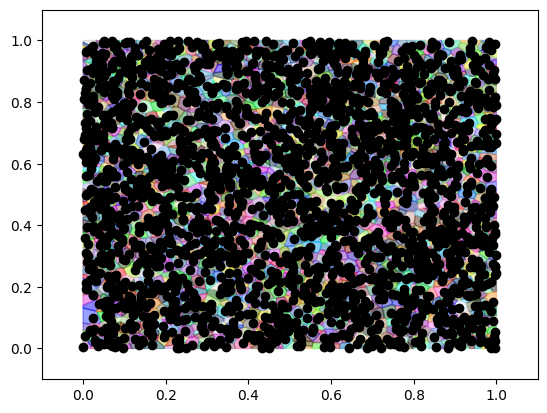

In [73]:
# python 3.5, pyvoro 1.3.2, linux x64
import matplotlib
import matplotlib.pyplot as plt
import pyvoro
import numpy as np

dots_num = 2500
dots = np.random.rand(dots_num, 2)
# dots = np.vstack([dots,dots[[0],:]+np.random.randn(1,2)*0.001,
#                   dots[[0],:]+np.random.randn(1,2)*0.001,
#                   dots[[0],:]+np.random.randn(1,2)*0.001,
#                   dots[[0],:]+np.random.randn(1,2)*0.001,])
colors = np.random.rand(len(dots), 3) # or predefined 
# make color map (unnecessary for just random colorization)
color_map = {tuple(coords):color for coords, color in zip(dots, colors)}

max_vals = dots.max(axis=0) + np.ptp(dots, axis=0)*0.05
min_vals = dots.min(axis=0) - np.ptp(dots, axis=0)*0.05

st = time()

cells = pyvoro.compute_2d_voronoi(dots, # point positions, 2D vectors this time.
# [[min_vals[0], max_vals[0]], [-0.1, 1.1]], # box size
[[0.0, 1.0], [0.0, 1.0]], # box size
2.0 # block size
)
print(time() -st)
# # colorize
# for i, cell in enumerate(cells):    
#     polygon = cell['vertices']
#     # print(np.array(polygon))
#     plt.fill(*zip(*polygon), color = color_map[tuple(cell['original'])], alpha=0.5)
# plt.plot(dots[:,0], dots[:,1], 'ko')
# plt.scatter(dots[0,0],dots[0,1], marker='x', c='r', s=100)
# plt.xlim(-0.1, 1.1)
# plt.ylim(-0.1, 1.1)

# plt.show()

In [4]:
# python 3.5, pyvoro 1.3.2, linux x64
import matplotlib
import matplotlib.pyplot as plt
import pyvoro
import numpy as np
from time import time

dots_num = (50**2) * 8
dots = np.random.rand(dots_num, 4)
# dots = np.vstack([dots,dots[[0],:]+np.random.randn(1,2)*0.001,
#                   dots[[0],:]+np.random.randn(1,2)*0.001,
#                   dots[[0],:]+np.random.randn(1,2)*0.001,
#                   dots[[0],:]+np.random.randn(1,2)*0.001,])
colors = np.random.rand(len(dots), 3) # or predefined 
# make color map (unnecessary for just random colorization)
color_map = {tuple(coords):color for coords, color in zip(dots, colors)}

max_vals = dots.max(axis=0) + np.ptp(dots, axis=0)*0.05
min_vals = dots.min(axis=0) - np.ptp(dots, axis=0)*0.05

st = time()

cells = pyvoro.compute_voronoi(dots, # point positions, 2D vectors this time.
# [[min_vals[0], max_vals[0]], [-0.1, 1.1]], # box size
[[0.0, 1.5], [0.0, 2.0], [-1.0, 1.0], [0.0, 1.0]], # box size
2.0 # block size
)
print(time() -st)
# # colorize
# for i, cell in enumerate(cells):    
#     polygon = cell['vertices']
#     # print(np.array(polygon))
#     plt.fill(*zip(*polygon), color = color_map[tuple(cell['original'])], alpha=0.5)
# plt.plot(dots[:,0], dots[:,1], 'ko')
# plt.scatter(dots[0,0],dots[0,1], marker='x', c='r', s=100)
# plt.xlim(-0.1, 1.1)
# plt.ylim(-0.1, 1.1)

# plt.show()

22.457557916641235


In [8]:
pyvoro.voroplusplus.voronoi()

AttributeError: module 'voroplusplus' has no attribute 'voronoi'

In [124]:
cells

[{'original': array([0.17253272, 0.90177375, 0.96534921, 0.63169856]),
  'volume': 0.3729911597737177,
  'vertices': [array([ 0.00000000e+00,  5.54395117e-01, -1.11022302e-16]),
   array([ 1.00000000e+00,  8.39354969e-01, -1.11022302e-16]),
   array([0., 1., 0.]),
   array([1., 1., 0.]),
   array([0.        , 0.41466271, 1.        ]),
   array([1.        , 0.69962256, 1.        ]),
   array([0., 1., 1.]),
   array([1., 1., 1.])],
  'adjacency': [[4, 2, 1],
   [0, 3, 5],
   [0, 6, 3],
   [2, 7, 1],
   [5, 6, 0],
   [1, 7, 4],
   [7, 2, 4],
   [5, 3, 6]],
  'faces': [{'adjacent_cell': 1, 'vertices': [1, 0, 4, 5]},
   {'adjacent_cell': -5, 'vertices': [1, 3, 2, 0]},
   {'adjacent_cell': -2, 'vertices': [1, 5, 7, 3]},
   {'adjacent_cell': -1, 'vertices': [2, 6, 4, 0]},
   {'adjacent_cell': -4, 'vertices': [2, 3, 7, 6]},
   {'adjacent_cell': -6, 'vertices': [4, 6, 7, 5]}]},
 {'original': array([0.39677962, 0.11483166, 0.8553879 , 0.7565377 ]),
  'volume': 0.6270088402262823,
  'vertices': [

In [129]:
from scipy.spatial import Voronoi
from time import time
st = time()
dts = Voronoi(dots)
time() -st


0.0011625289916992188

In [130]:
dts.vertices.shape

(118, 4)

In [119]:
cell['volume']

0.16707227629879706

In [139]:
vertices = []
volumes = []
for i, cell in enumerate(cells):
    # print(np.array(cell['vertices']).shape[0])
    vertices.append(cell['vertices'])
    # print(np.array(cell['volume']))
    volumes.append(cell['volume'])
# vertices = np.concat(vertices)
volumes = np.array(volumes)
print(sum(volumes))

6.000000000000009


np.float64(0.9999999999999999)

In [106]:
1.1**4

1.4641000000000004

In [90]:
len(vertices)

2500

In [93]:
ver

NameError: name 'ver' is not defined

In [98]:
a=0
for ver in vertices:
    a+=len(ver)
a

61132

In [52]:
volumes

array([0.0101725 , 0.0121438 , 0.01012808, 0.01516869, 0.01358643,
       0.01324739, 0.00647248, 0.01017132, 0.00291027, 0.00926148,
       0.00793012, 0.01139967, 0.01285593, 0.01435333, 0.00944658,
       0.00355352, 0.00772664, 0.00522149, 0.01365655, 0.00399049,
       0.00878266, 0.00886785, 0.00774616, 0.0112782 , 0.01714439,
       0.0261146 , 0.00760665, 0.01229857, 0.01653093, 0.00605231,
       0.00285653, 0.00402286, 0.00665331, 0.01167896, 0.01253195,
       0.00557992, 0.0177089 , 0.00532108, 0.00714796, 0.01122219,
       0.01216079, 0.00664   , 0.01742823, 0.01550109, 0.00564638,
       0.00911069, 0.00644847, 0.02160429, 0.0044317 , 0.01259781,
       0.01171371, 0.0196051 , 0.00849935, 0.01263464, 0.00763343,
       0.01142312, 0.00222334, 0.00724775, 0.00413375, 0.00498452,
       0.00686351, 0.00608573, 0.00700013, 0.00714847, 0.00814429,
       0.01587384, 0.01625305, 0.00910214, 0.00973088, 0.01521812,
       0.00570315, 0.005798  , 0.00405693, 0.0051593 , 0.00388

In [53]:
import torch
prototypes = torch.tensor(dots)
temperature = torch.nn.Parameter(torch.tensor(0.01), requires_grad=True)
optimizer = torch.optim.Adam([temperature], lr=1e-4)
temp_vals = [temperature.item()]
loss_vals = []
best_temp = temperature.item()
best_loss = 1000000
for i in range(10000):
    proto_dist_list = torch.cdist(prototypes, prototypes)
    proto_negexp_distances = torch.nn.functional.softmin(proto_dist_list / temperature, dim=-1)

    apprx_dists = proto_negexp_distances[range(len(proto_negexp_distances)),range(len(proto_negexp_distances))]
    apprx_dists_normalized = apprx_dists/apprx_dists.sum()

    volumes_normalized = torch.tensor(volumes/volumes.sum())
    loss = torch.norm(apprx_dists_normalized - volumes_normalized)
    if loss.item() < best_loss:
        best_temp = temperature.item()
        best_loss = loss.item()
    print(loss)
    loss.backward()
    optimizer.step()
    temp_vals.append(temperature.item())
    loss_vals.append(loss.item())
    

tensor(0.0508, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0507, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0507, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0507, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0506, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0506, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0505, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0505, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0505, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0504, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0504, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0503, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0503, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.0502, dtype=torch.float64, grad_fn=<Linalg

0.036885932087898254


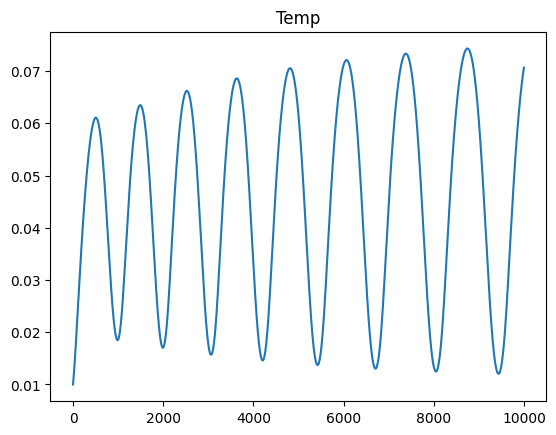

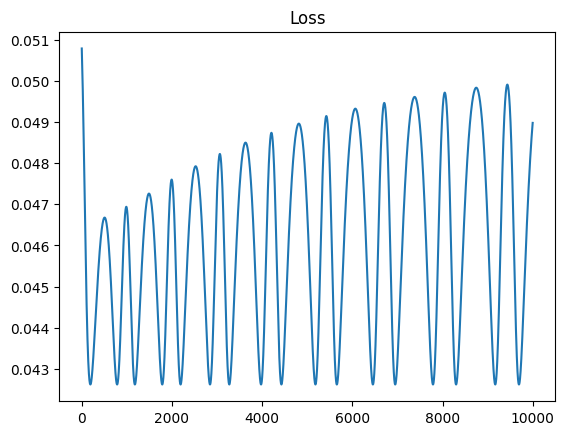

In [54]:
print(best_temp)
plt.figure()
plt.title("Temp")
plt.plot(temp_vals)
plt.show()
plt.figure()
plt.title("Loss")
plt.plot(loss_vals)
plt.show()

In [152]:
temperature

Parameter containing:
tensor(8.7290, requires_grad=True)

In [90]:
torch.norm(apprx_dists/apprx_dists.sum() - torch.tensor(volumes/volumes.sum()))

tensor(0.1502, dtype=torch.float64)

In [39]:
proto_log_areas.sum()

tensor(1.6147, dtype=torch.float64)